In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.metrics import MeanSquaredError

In [2]:
ethereum = pd.read_csv("Coin_Ethereum.csv",index_col='SNo') #getting Etherium price history

In [3]:
ethereum.pop('Symbol')
ethereum.pop('Name')
ethereum.pop('Date')
ethereum

,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,
1,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
2,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
3,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
4,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
5,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...
2156,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2157,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2158,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11


In [4]:
def create_sequences(arr,start,end): #This function makes test and train sets
    x_data = arr[start:end]
    y_data = x_data.pop('Close')
    
    x_data = x_data.values
    y_data = y_data.values
    
    x_data = x_data[:,:,np.newaxis]
    return x_data,y_data

In [5]:
def normolize(arr):#This function normalize the data
    try:
        for i in range(arr.shape[1]):
            power = np.floor(np.log10(max(arr[:,i]))+1)
            arr[:,i] = arr[:,i]/(10**power)
    except:
        for i in range(arr.shape[0]):
            power = np.floor(np.log10(max(arr[:]))+1)
            arr[:] = arr[:]/(10**power)

In [6]:
def build_lstm ():
    # Build an LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (5, 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])
    model.summary()
    
    return model

model = build_lstm()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_x , train_y = create_sequences(ethereum,len(ethereum)-120,len(ethereum)-20)
normolize(train_x)
normolize(train_y)

In [8]:
test_x , test_y = create_sequences(ethereum,len(ethereum)-20,len(ethereum)-1)
normolize(test_x)
normolize(test_y)

In [9]:
hist = model.fit(train_x, train_y, epochs=400)

Epoch 1/400
4/4 [==============================] - 6s 23ms/step - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 2/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 3/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 4/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 5/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 6/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 7/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 8/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 9/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 10/400
4/4 [==========

In [10]:
predictions = model.predict(test_x)

c:\users\dear user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dear user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

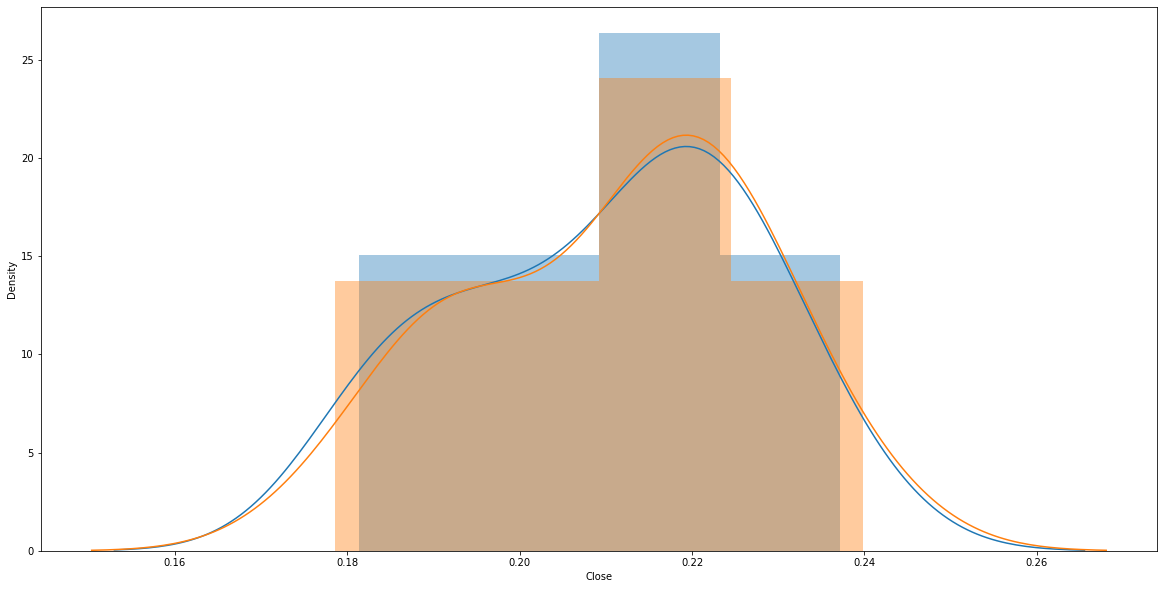

In [11]:
plt.figure(figsize=(20,10))
sns.distplot(a=ethereum[len(ethereum)-20:len(ethereum)-1]['Close'],label='Real Close price of Etherium')
sns.distplot(a=predictions,label='Predicted price of Etherium')

In [12]:
data_plot = np.zeros((19,2))
data_plot[:,0] = np.array(ethereum[len(ethereum)-20:len(ethereum)-1]['Close'])
predictions = predictions.reshape(19)
data_plot[:,1] = predictions

In [13]:
data_plot = pd.DataFrame(data_plot, columns = ['Real Price', 'Predicted Price'])

<AxesSubplot:>

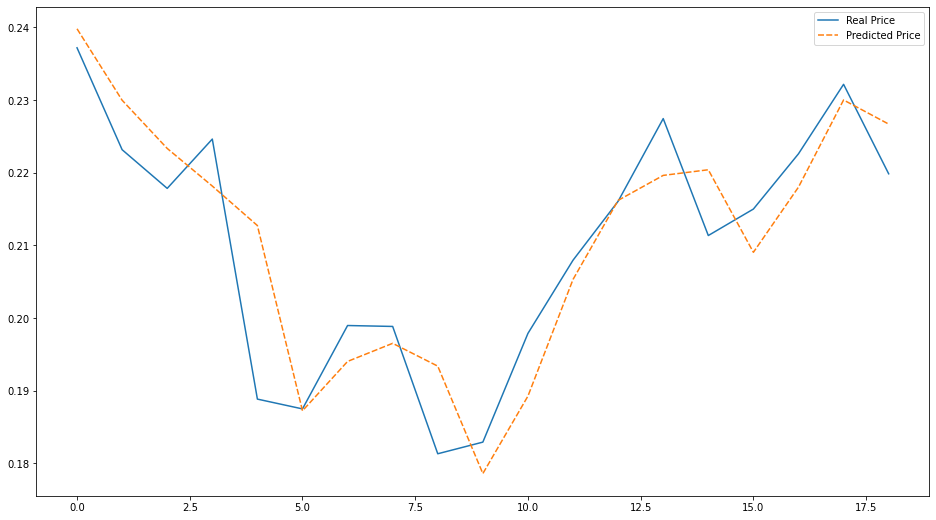

In [14]:
plt.figure(figsize=(16,9))
sns.lineplot(data = data_plot)